Inferential Questions

* What are the most sought-after skills for data-analyst positions?
* Which cities are hiring the most data-analysts?
* Which companies are hiring the most data-analysts?
* How do salary outcomes differ between remote-work & non-remote work?

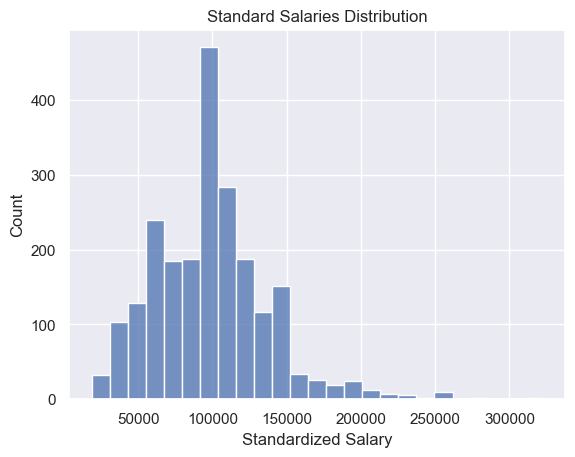

In [212]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

standard_salaries = pd.read_csv('data/cleaned_data.csv')

# standard salaries distribution 
sns.histplot(data=standard_salaries, x ='salary_standardized', bins = 25)
plt.title('Standard Salaries Distribution')
plt.xlabel('Standardized Salary')
plt.savefig('images/std_salaries_dis.png', dpi = 300, bbox_inches = "tight")
plt.show()




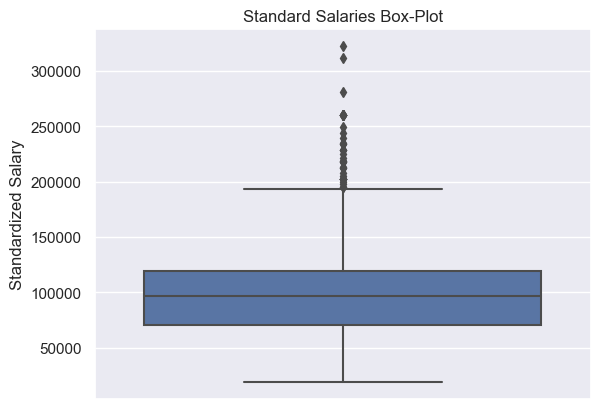

In [211]:
sns.boxplot(data=standard_salaries, y ='salary_standardized')
plt.title('Standard Salaries Box-Plot')
plt.ylabel('Standardized Salary')
plt.savefig('images/std_salaries_boxplot.png', dpi = 300, bbox_inches = "tight")
plt.show()



In [147]:
from scipy import stats

# perform KS test
stats.kstest(standard_salaries['salary_standardized'], stats.norm.cdf, args = (standard_salaries['salary_standardized'].mean(), standard_salaries['salary_standardized'].std()))

KstestResult(statistic=0.0884061189073454, pvalue=1.3144684207219982e-15)

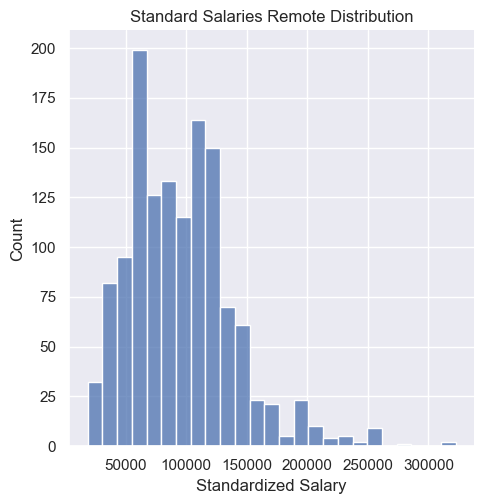

In [104]:
# standard salaries remote distribution

remote_salaries = standard_salaries.loc[standard_salaries['work_from_home'] == True]

sns.displot(data=remote_salaries, x ='salary_standardized', bins = 25)
plt.title('Standard Salaries Remote Distribution')
plt.xlabel('Standardized Salary')
plt.savefig('images/std_salaries_remote_dis.png', dpi = 300, bbox_inches = "tight")
plt.show()



In [213]:
# KS Test
stats.kstest(remote_salaries['salary_standardized'], stats.norm.cdf, args = (remote_salaries['salary_standardized'].mean(), remote_salaries['salary_standardized'].std()))

KstestResult(statistic=0.07387056224442179, pvalue=9.112003142853422e-07)

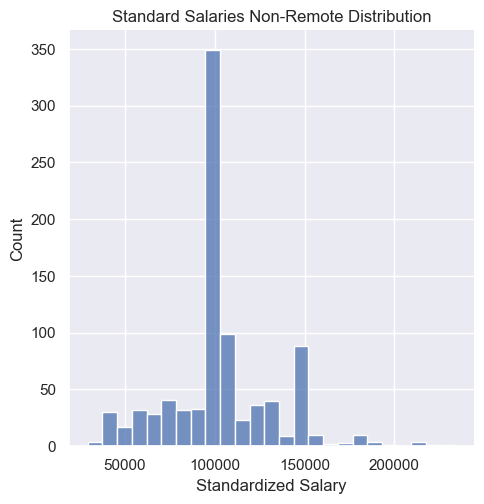

In [214]:
# standard salaries non-remote distribution

nonremote_salaries = standard_salaries.loc[standard_salaries['work_from_home'] == False]

sns.displot(data=nonremote_salaries, x ='salary_standardized', bins = 25)
plt.title('Standard Salaries Non-Remote Distribution')
plt.xlabel('Standardized Salary')
plt.savefig('images/std_salaries_nonremote_dis.png', dpi = 300, bbox_inches = "tight")
plt.show()


In [215]:
# KS Test
stats.kstest(nonremote_salaries['salary_standardized'], stats.norm.cdf, args = (nonremote_salaries['salary_standardized'].mean(), nonremote_salaries['salary_standardized'].std()))

KstestResult(statistic=0.18113066066731165, pvalue=3.1845386975985177e-26)

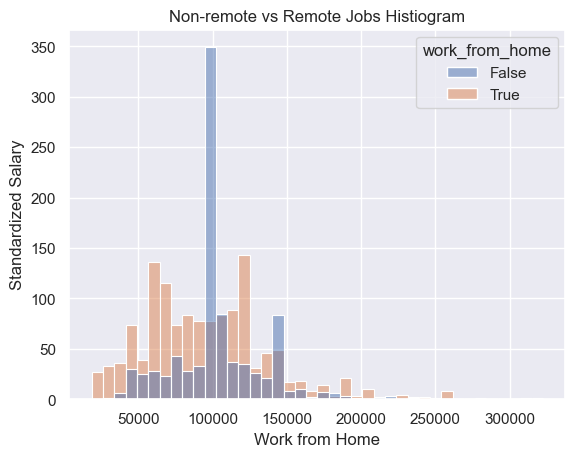

In [216]:
# hist plot non-remote vs remote 
sns.histplot(data=standard_salaries, x = standard_salaries['salary_standardized'], hue = 'work_from_home')
plt.title('Non-remote vs Remote Jobs Histiogram')
plt.xlabel('Work from Home')
plt.ylabel('Standardized Salary')
plt.savefig('images/nonremotevsremote_jobs_hist.png', dpi = 300, bbox_inches = "tight")
plt.show()


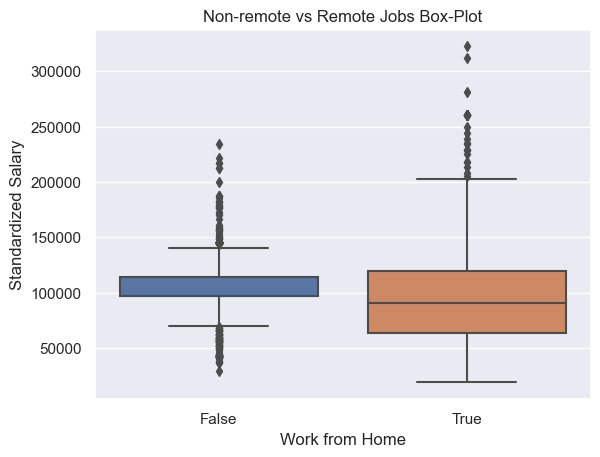

In [217]:
# box plot comparing remote vs non remote 
sns.boxplot(data=standard_salaries, y = standard_salaries['salary_standardized'], x = 'work_from_home')
plt.title('Non-remote vs Remote Jobs Box-Plot')
plt.xlabel('Work from Home')
plt.ylabel('Standardized Salary')
plt.savefig('images/nonremotevsremote_jobs_boxplot.png', dpi = 300, bbox_inches = "tight")
plt.show()

## Python Visualizations & Statistics

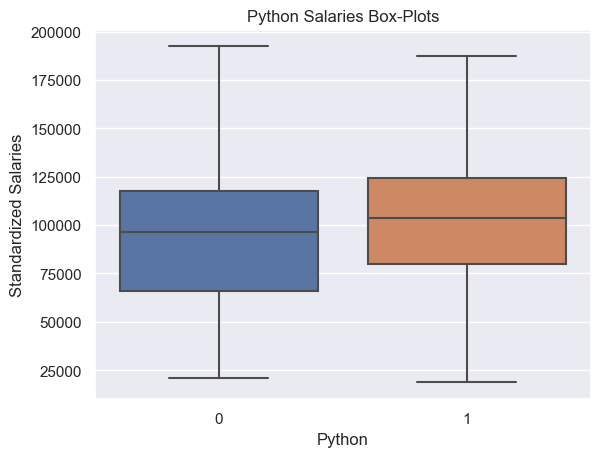

In [219]:
# distribution of salaries for skill-occurence: sql, python, tableau
sns.boxplot(data = standard_salaries, x='python', y='salary_standardized', showfliers = False)

plt.xlabel('Python')
plt.ylabel('Standardized Salaries')
plt.title('Python Salaries Box-Plots')
plt.savefig('images/python_salaries.png', dpi = 300, bbox_inches = "tight")
plt.show()


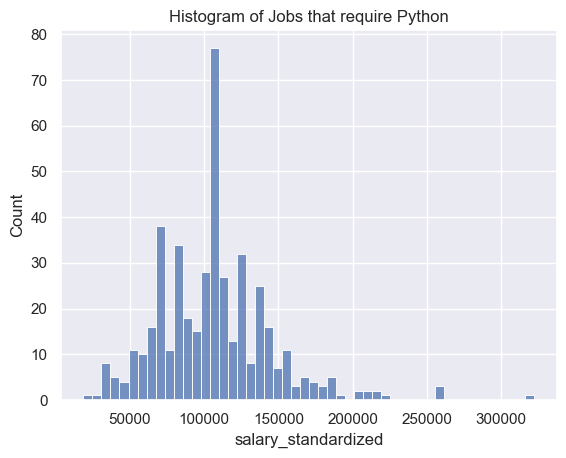

In [249]:
# histogram 
python_sal = standard_salaries['salary_standardized'].loc[standard_salaries['python'] == True]

sns.histplot(data=standard_salaries, x = python_sal, bins = 50)
plt.title('Histogram of Jobs that require Python')
plt.savefig('images/python_salaries_hist.png')
plt.show()

In [255]:
# KS Test
stats.kstest(python_sal, stats.norm.cdf, args = (python_sal.mean(), python_sal.std()))

KstestResult(statistic=0.10816134598371768, pvalue=5.10047874128866e-05)

## SQL Visualizations & Statistics

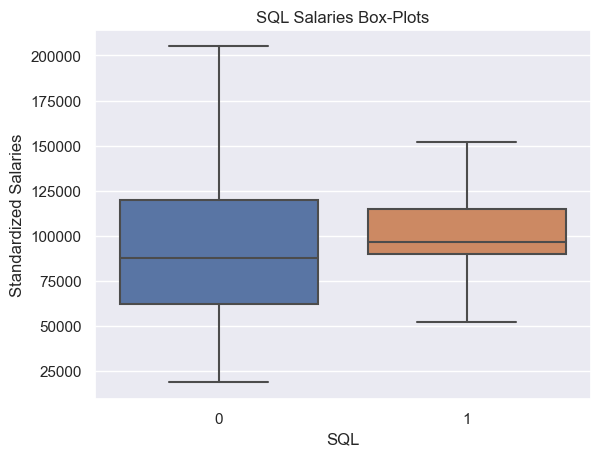

In [220]:
sns.boxplot(data = standard_salaries, x='sql', y='salary_standardized', showfliers = False)
plt.xlabel('SQL')
plt.ylabel('Standardized Salaries')
plt.title('SQL Salaries Box-Plots')
plt.savefig('images/sql_salaries.png', dpi = 300, bbox_inches = "tight")
plt.show()


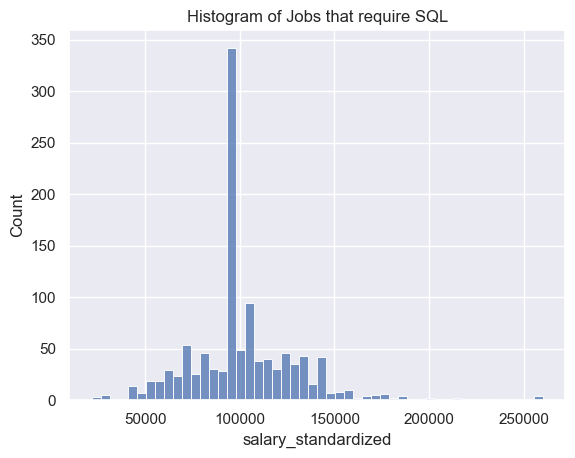

In [250]:
# histogram 
sql_sal = standard_salaries['salary_standardized'].loc[standard_salaries['sql'] == True]

sns.histplot(data=standard_salaries, x = sql_sal, bins = 50)
plt.title('Histogram of Jobs that require SQL')
plt.savefig('images/sql_salaries_hist.png')
plt.show()

In [256]:
# KS Test
stats.kstest(sql_sal, stats.norm.cdf, args = (sql_sal.mean(), sql_sal.std()))

KstestResult(statistic=0.14859694970660242, pvalue=2.428624055011534e-22)

## Tableau Visualizations & Statistics

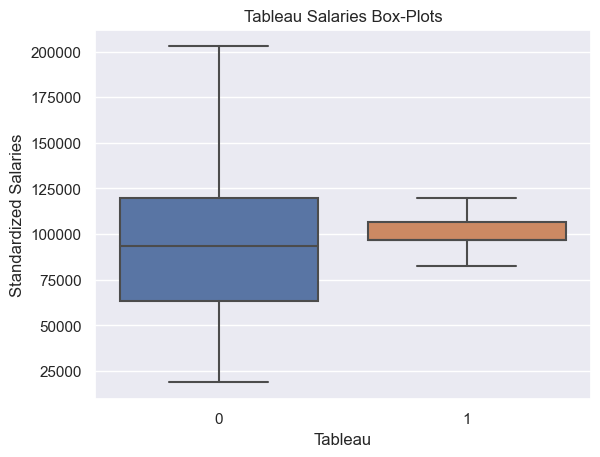

In [223]:
sns.boxplot(data = standard_salaries, x='tableau', y='salary_standardized', showfliers = False)
plt.xlabel('Tableau')
plt.ylabel('Standardized Salaries')
plt.title('Tableau Salaries Box-Plots')
plt.savefig('images/tableau_salaries.png', dpi = 300, bbox_inches = "tight")
plt.show()


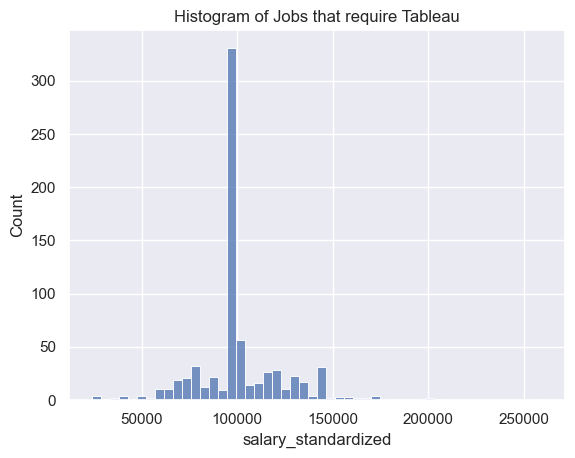

In [251]:
# histogram 
tableau_sal = standard_salaries['salary_standardized'].loc[standard_salaries['tableau'] == True]

sns.histplot(data=standard_salaries, x = tableau_sal, bins = 50)
plt.title('Histogram of Jobs that require Tableau')
plt.savefig('images/tableau_salaries_hist.png')
plt.show()

In [257]:
# KS Test
stats.kstest(tableau_sal, stats.norm.cdf, args = (tableau_sal.mean(), tableau_sal.std()))

KstestResult(statistic=0.22652993258106247, pvalue=1.9059409500066243e-33)

# Ranked Skills

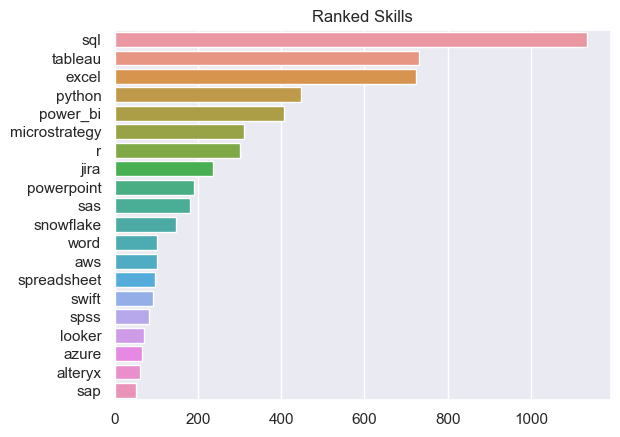

In [261]:
# top requested skills  
top_skills = standard_salaries.iloc[:, 20:].sum().sort_values(ascending=False)

selected = top_skills.head(20)
sns.barplot(x = selected.values, y = selected.index)
plt.title('Ranked Skills')
plt.savefig('images/ranked_skills.png', dpi = 300, bbox_inches = "tight")
plt.show()

## Top-hiring Locations

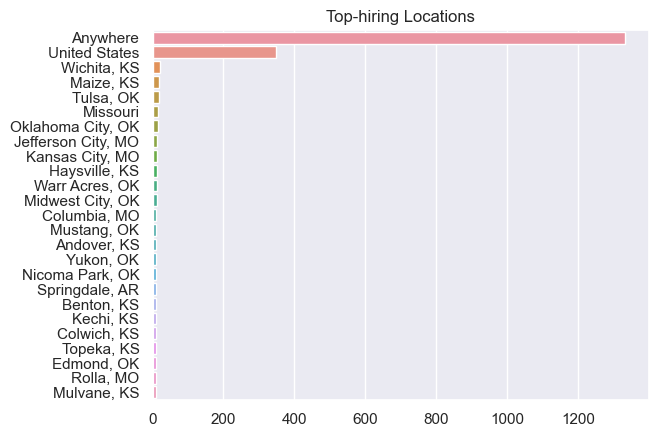

In [229]:
# distribution of city-occurence 
top_locations = standard_salaries.location.value_counts().sort_values(ascending = False)

selected = top_locations.head(25)
sns.barplot(y = selected.index, x = selected.values)
plt.title('Top-hiring Locations')
plt.savefig('images/top_loc.png', dpi = 300, bbox_inches = "tight")
plt.show()

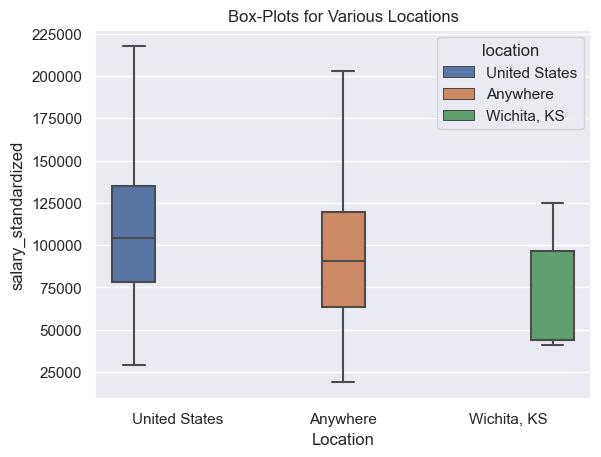

In [309]:
# box plots for locations 

desired_locations = ['United States','Anywhere','Wichita, KS']
filtered_data = standard_salaries.loc[standard_salaries['location'].isin(desired_locations)]

sns.boxplot(data = filtered_data, x= 'location', y= 'salary_standardized', showfliers = False, hue = 'location')
plt.xlabel('Location')
plt.title('Box-Plots for Various Locations')
plt.savefig('images/boxplotfor3loc.png', dpi = 300, bbox_inches = "tight")
plt.show()

## Top-hiring Companies

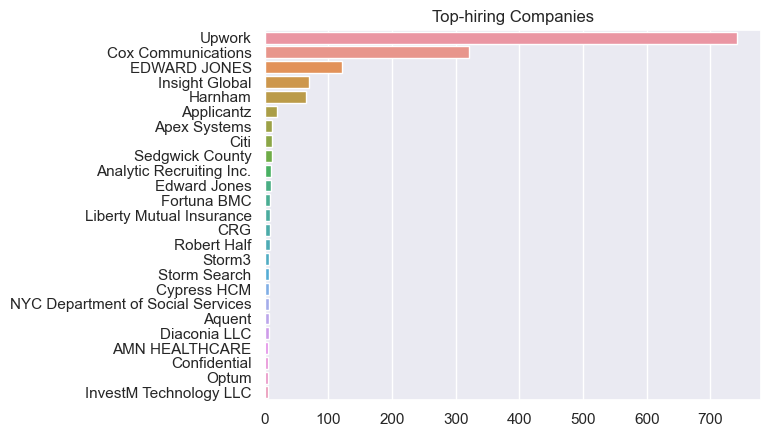

In [230]:
# distribution of company-occurence
top_companies = standard_salaries.company_name.value_counts().sort_values(ascending = False)

selected = top_companies.head(25)
sns.barplot(y = selected.index, x = selected.values)
plt.title('Top-hiring Companies')
plt.savefig('images/top_companies.png', dpi = 300, bbox_inches = "tight")
plt.show()
#

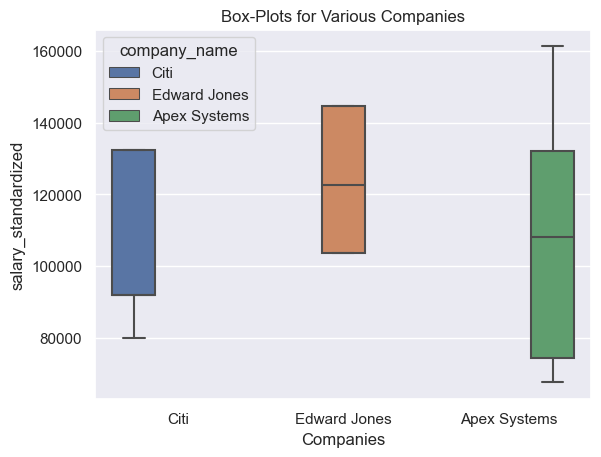

In [314]:
# box plots for companies 

desired_companies = ['Citi','Edward Jones','Apex Systems']
filtered_data2 = standard_salaries.loc[standard_salaries['company_name'].isin(desired_companies)]

sns.boxplot(data = filtered_data2, x= 'company_name', y= 'salary_standardized', showfliers = False, hue = 'company_name')
plt.xlabel('Companies')
plt.title('Box-Plots for Various Companies')
plt.savefig('images/boxplotfor3companies.png', dpi = 300, bbox_inches = "tight")
plt.show()